In [1]:
#-------------------------------------------------------------------------
# QAOA Simple Implementation
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import numpy as np
from scipy.optimize import minimize

from qiskit import Aer, execute
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import circuit_drawer
#-------------------------------------------------------------------------

# Define QAOA parameters
num_qubits = 3
gamma = Parameter('γ')
beta  = Parameter('β')

# Create QAOA circuit
qc = QuantumCircuit(num_qubits)

# Initialize in superposition
qc.h(range(num_qubits))  
for i in range(num_qubits - 1):  # Apply cost Hamiltonian
    qc.cx(i, i + 1)
    qc.rz(2 * gamma, i + 1)
    qc.cx(i, i + 1)

qc.rx(2 * beta, range(num_qubits))  # Apply mixing Hamiltonian

print("Simple QAOA Circuit:")
print(qc)


Simple QAOA Circuit:
     ┌───┐                     ┌─────────┐                           
q_0: ┤ H ├──■───────────────■──┤ Rx(2*β) ├───────────────────────────
     ├───┤┌─┴─┐┌─────────┐┌─┴─┐└─────────┘                ┌─────────┐
q_1: ┤ H ├┤ X ├┤ Rz(2*γ) ├┤ X ├─────■──────────────────■──┤ Rx(2*β) ├
     ├───┤└───┘└─────────┘└───┘   ┌─┴─┐   ┌─────────┐┌─┴─┐├─────────┤
q_2: ┤ H ├────────────────────────┤ X ├───┤ Rz(2*γ) ├┤ X ├┤ Rx(2*β) ├
     └───┘                        └───┘   └─────────┘└───┘└─────────┘


Quantum Circuit:


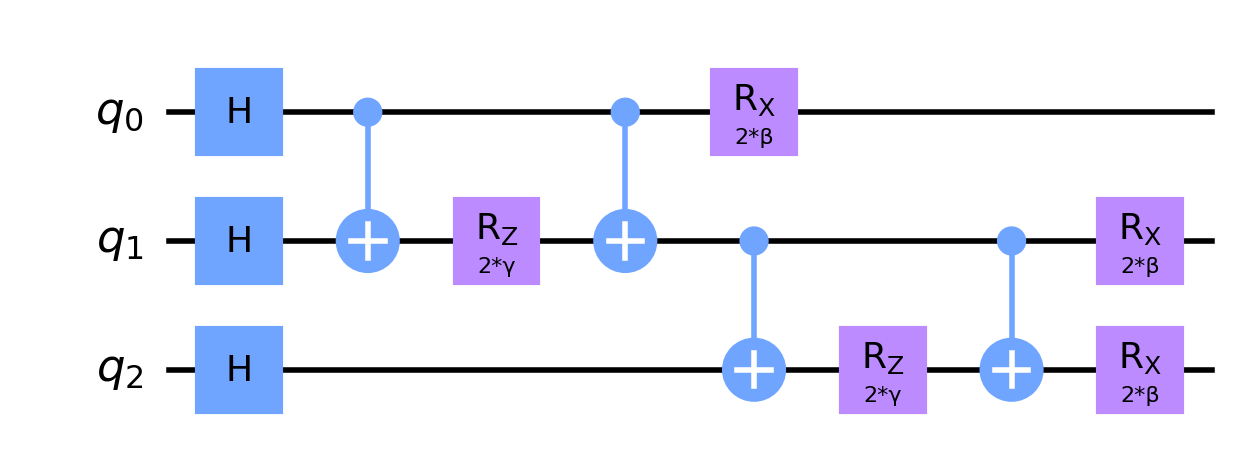

In [2]:
# Visualize the circuit
print("Quantum Circuit:")
qc.draw(output='mpl', style={'backgroundcolor': '#FFFFFF', 'dpi': 900}, scale=2)